# `audio_io`

The `audio_io` module contains some functions that enable playing and recording audio directly within python. It utilizes mostly the library [sounddevice](https://python-sounddevice.readthedocs.io/en/0.4.6/) which itself is built upon [PortAudio](http://www.portaudio.com).

This notebook demonstrates some of the functionalities of this library. Therefore, beware that audio playback and recording is part of this notebook!

In [1]:
import dsptoolbox as dsp
from os.path import join

### Setting up

In [2]:
# See available devices
dsp.audio_io.print_device_info()

# ===== Set audio device to use
# dsp.audio_io.set_device()  # Change number according to your hardware

# NOTE: If None is passed, a list is prompted and some user input is expected
# for the device number. This only works reliably in a script

  0 LEN P27u-10, Core Audio (0 in, 2 out)
  1 LEN P27u-10, Core Audio (0 in, 2 out)
  2 Mikrofon von „iPhone von Juan Nicolas“, Core Audio (1 in, 0 out)
> 3 MacBook Pro-Mikrofon, Core Audio (1 in, 0 out)
< 4 MacBook Pro-Lautsprecher, Core Audio (0 in, 2 out)
  5 Microsoft Teams Audio, Core Audio (2 in, 2 out)


### Record


Recording started (3.0 s)...
Recording has ended



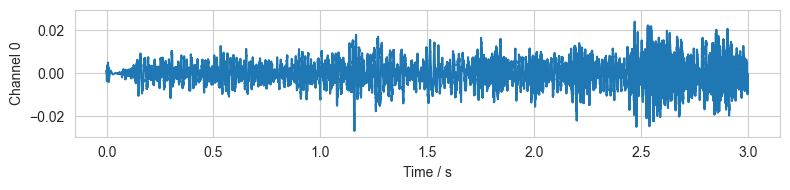

In [3]:
rec = dsp.audio_io.record(
    duration_seconds=3,
    sampling_rate_hz=16_000,
    device=3,                   # A specific device name or number.
                                # If None, the default is used
    rec_channels=[1]            # Recording channel for the given device
)
# NOTE: The channels start here with 1 instead of 0 as in the Signal class
rec.plot_time();

### Play

In [4]:
dsp.audio_io.play(rec,
                  duration_seconds=None,        # Trim signal to have a maximum length
                  normalized_dbfs=-10,          # Normalize before playback
                  device=4,                     # Select device
                  play_channels=[1]             # Select channel
)

Playback started (3.0 s)...
Playback has ended



Playback can also be triggered with in a streaming manner where the audio is processed in blocks before being reproduced.

In [5]:
dsp.audio_io.play_through_stream(rec,
                                 blocksize=2048,
                                 audio_callback=dsp.audio_io.standard_callback,
                                 device=4
)
# See documentation for more information about the callback

### Play and record
Play and record allows the simultaneous playback and recording of audio. This is useful for acquiring impulse responses of a system, for instance.

Depending on your audio device, it might not be possible to use it for playing and recording at the same time.

In [7]:
# chirp = dsp.Signal(join('data', 'chirp.wav'))
# dsp.audio_io.play_and_record(signal=chirp,
#                              duration_seconds=None,
#                              normalized_dbfs=-10,
#                              device=None,
#                              play_channels=None,
#                              rec_channels=[1])